<a href="https://colab.research.google.com/github/Nahom32/Random-Images/blob/main/Random_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dependency Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/My Drive/tiger.txt', sep="\s+")
print(data)

     2.3680650e-01  2.1786198e-01  2.4086604e-01  2.7740189e-01  \
0         0.281461       0.278755       0.247632       0.243572   
1         0.239513       0.250338       0.242219       0.247632   
2         0.189445       0.193505       0.242219       0.246279   
3         0.193505       0.194858       0.258457       0.236807   
4         0.215156       0.220568       0.250338       0.227334   
..             ...            ...            ...            ...   
230       0.460081       0.435724       0.458728       0.464141   
231       0.442490       0.461434       0.439783       0.433018   
232       0.451962       0.454668       0.446549       0.433018   
233       0.431664       0.419486       0.403248       0.419486   
234       0.424899       0.408660       0.412720       0.407307   

     2.7198917e-01  3.3829499e-01  3.2341001e-01  2.6792963e-01  \
0         0.223275       0.262517       0.277402       0.263870   
1         0.238160       0.255751       0.263870       0.2313

## Task 1
Display the matrix as a grayscale image, and put the image into your report.

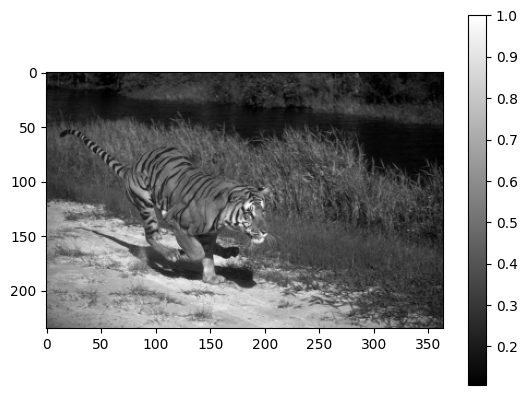

In [4]:
plt.imshow(data, cmap='gray')
plt.colorbar()
plt.show()

## Task 2
Provide bar plots for the histogram counts for the grey values of the tiger im-
age and one of the random images that you used in the preceding question.
Provide similar plots where the counts have been converted to empirical
probabilities by scaling them so that they sum to one. Put the plots into
your PDF with an informative caption.

In [5]:
flatten_matrix = data.values.flatten()
print(flatten_matrix)

[0.28146143 0.27875507 0.24763194 ... 0.26657645 0.25575101 0.25439783]


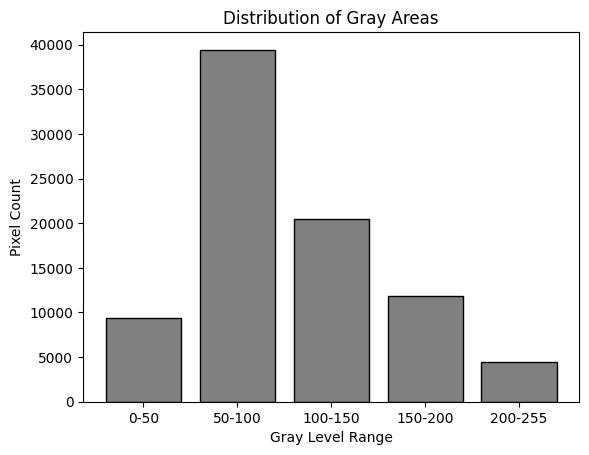

In [6]:
pixel_values = (flatten_matrix*255).astype(int) #This is because values are from 0 - 1
bins = [0, 50, 100, 150, 200, 255]
counts, bin_edges = np.histogram(pixel_values, bins=bins)
bin_labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)] # addition of ranges to make it categorical.

plt.bar(bin_labels, counts, color='gray', edgecolor='black')
plt.xlabel('Gray Level Range')
plt.ylabel('Pixel Count')
plt.title('Distribution of Gray Areas')
plt.show()

#print(counts)


## Task 3
Grayscale means that each pixel has a brightness represented by 8 bits per
pixel (256 shades of gray). This means that the grayscale tiger image could
be thought of as a (uniform) random sample of an integer between 0 to 255,
repeated for each pixel in the 236x364 grid. Create two images that are such
random samples and put them into your report. [Three sub-figures side by
side probably works best]. Are the new images recognizable as scenes in
the world like the tiger image?[Hint: Create and display some additional
examples as needed (but do not put them into your report) to comment on
the difference (if any) between the random examples and whether:

*   the difference (if any) between the random examples and whether a different random seed would change your conclusions
*    the relationship (if any) between the generated random images and everyday visual content
*   does this experiment tell you anything about everyday visual content







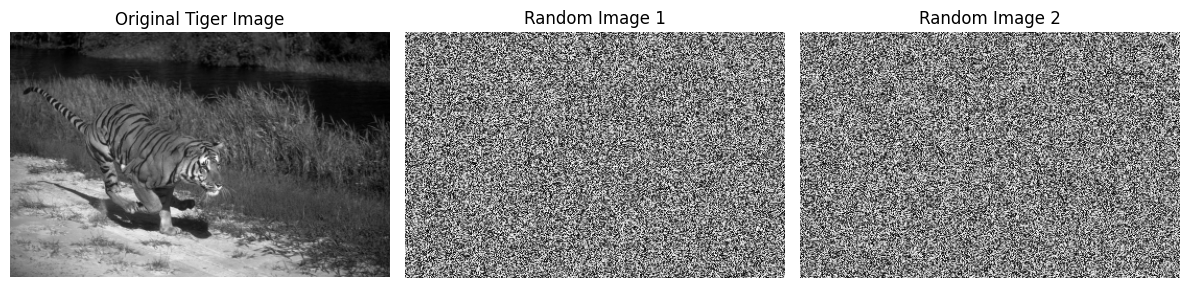

In [7]:
height= 236
width = 364 # taken from the input of the dataset

# Two random images
img1 = np.random.randint(0, 256, (height, width), dtype=np.uint8)
img2 = np.random.randint(0, 256, (height, width), dtype=np.uint8)
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(data, cmap='gray') # The tiger image
axs[0].set_title("Original Tiger Image")
axs[1].imshow(img1, cmap='gray')
axs[1].set_title("Random Image 1")
axs[2].imshow(img2, cmap='gray')
axs[2].set_title("Random Image 2")

for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.savefig("comparison.png", dpi=300)  # for report inclusion
plt.show()

## Normal and Binomial Distribution Comparison

In [8]:
from scipy.stats import norm, binom

In [12]:

# Parameters
no_trials = 1000
p_6 = 1/6
p_5 = 1/6

# (a) Normal approximation for X ~ Binomial(1000, 1/6)
mu_X = no_trials * p_6
sigma_X = np.pow((no_trials * p_6 * (1 - p_6)) , 0.5)

#Continuity correction: P(149.5 < X < 200.5)
prob_a = norm.cdf(200.5, loc=mu_X, scale=sigma_X) - norm.cdf(149.5, loc=mu_X, scale=sigma_X)

# (b) Given X = 200, compute P(Y < 150), assuming independence
# Y ~ Binomial(1000, 1/6), same distribution
mu_Y = no_trials * p_5
sigma_Y = (no_trials * p_5 * (1 - p_5)) ** 0.5

#continuity correction for P(Y < 150)
prob_b = norm.cdf(149.5, loc=mu_Y, scale=sigma_Y)

# (c) Binomial Calculation
prob_a_exact = binom.cdf(200, no_trials, p_6) - binom.cdf(149, no_trials, p_6)
prob_b_exact = binom.cdf(149, no_trials, p_5)

print(prob_a, prob_a_exact)
print(prob_b, prob_b_exact)
print(prob_a_exact - prob_a)
print(prob_b_exact - prob_b)


0.9253452799490302 0.9264531668566224
0.07260789427292591 0.07105928386468251
0.001107886907592226
-0.0015486104082434032
